### MTH 459/559 - Ch 8 Black-Scholes Formula

In [1]:
# ch8_black-scholes_formula.ipynb  
import numpy as np # numerical & math calculations
import matplotlib.pyplot as plt # graphing 
import scipy.stats as sp # prob/stat functions

Here is an online calculator for the value of a European Call option that has been used to verify the result below for the test case parameters:
[Black-Scholes online calculator](https://goodcalculators.com/black-scholes-calculator/).





 

In [2]:
# define functions needed for European Call
def d1(S,K,T,t,r,sigma):
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return d1
def d2(S,K,T,t,r,sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return d2
def C_euro(S,K,T,t,r,sigma):
    C_euro = S*sp.norm.cdf(d1(S,K,T,t,r,sigma))-\
        K*np.exp(-r*(T-t))*sp.norm.cdf(d2(S,K,T,t,r,sigma)) 
    return C_euro

In [3]:
# test parameters
S = 110;
K = 100;
T = 1;
t = 0;
r = 0.05;
sigma = 0.3;
print(d1(S,K,T,t,r,sigma), d2(S,K,T,t,r,sigma), C_euro(S,K,T,t,r,sigma))

0.6343672660144165 0.33436726601441646 21.061031192609683


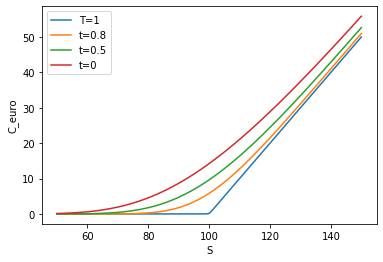

In [4]:
S = np.linspace(50,150,101);
eps = 1e-4; # a small number
C0 = C_euro(S,K,T,T-eps,r,sigma);
C1 = C_euro(S,K,T,T-0.2,r,sigma);
C2 = C_euro(S,K,T,T-0.5,r,sigma);
C3 = C_euro(S,K,T,0,r,sigma);
plt.plot(S,C0,label='T=1')
plt.plot(S,C1,label='t=0.8')
plt.plot(S,C2,label='t=0.5')
plt.plot(S,C3,label='t=0')
plt.xlabel('S')
plt.ylabel('C_euro')
plt.legend()
plt.show()